# CMSC320 Final Project (Pokemon)

## Kyl Bempah

## Introduction

With the past surge in pokemon enthusiast, courtesy of Pokemon Go many people have gained a new or renewed interest in pokemon. This is a tutorial on some simple ways to to collect data on the first six generations of pokemon. Afterwords it will process the data and output it so we can visualize it clearly. Analyze some patterns and draw conclusions based on them. By the end we hope to gain some insight on how to effectively hunt pokemon in various generations and as well as determine which pokemon to look for as the franchise continues. 

<img src = "pikachu.png">

We will do this using a variety of graphs analyzing data in a multitude of ways. As well as a bit of machine learning to establish future trends. By the end of this you won't need to "catch 'em all". The majority of this project will be observing trends in the pokemon as well as attempting to make a good hypothesis based on our observations.

#### Note: The code in this tutorial will be written is a long-winded fashion as to clearly show exactly what each cell is meant to do. Please bear in mind upon reading there are much more efficient ways to accomplish some of these tasks.

### Tutorial content

In this tutorial, we will show how to do some plot some graphs and apply linear regression using [Matplotlib](https://matplotlib.org/), [Pandas](pandas.pydata.org/), and [Sklearn](scikit-learn.org/).

We will be using data from a [pokemon database](https://www.kaggle.com/abcsds/pokemon). Explaining how to use various python commands to select and edit the dataset. Afterwords it will show how to display data in various formats. As well as properly predict trends, from which we shall draw several conclusions. You can re-create this tutorial with any of your favorite 90's Saturday morning cartoons, digimon, yugioh, etc.

We will be covering the following topics in this tutorial:
- [Installing the Libraries](#Installing-the-Libraries)
- [Loading and Plotting the Data](#Loading-and-Plotting-the-Data)
- [Analysis and Machine Learning](#Analysis-and-Machine-Learning)
- [Conclusion & Insight](#Conclusion-&-Insight)
- [Closing & Sources](#Closing-&-Sources)

## Installing the Libraries

First you need to have python installed (preferably Python 3 or greater).
Next You'll want to have some of the base python libraries installed.

    $ pip install numpy
    
    $ pip install scipy
    
    $ pip install scikit-learn
    
    $ pip install pandas

#### Note: The majority of these steps can be skipped through anaconda navigator installation.

## Loading and Plotting the Data

Now that everything is installed it's time to start downloading the necessary files.
First you'll need the a spreadsheet of the first six generations of pokemon along with their 'mega' forms.
This can be done by going to [kaggle](https://www.kaggle.com/datasets) and searching for a dataset. The database that I'm using came from [here](https://www.kaggle.com/abcsds/pokemon).

Extracting the csv file then pasting that to wherever your python machine reads from is your first step.
Since I am using a dataset with comma-seperated values so I read the file using pandas' [read_csv](pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function after importing the necessary libraries, I use  [Matplot](https://matplotlib.org/), [Pandas](pandas.pydata.org/), and [Numpy](www.numpy.org/) specifically as my defaults for most python projects. 

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Reading in my dataset and displaying the lead rows
data = pd.read_csv("Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Now my data set includes a total column which holds the number of the combined stats of that particular pokemon. And I can edit and arrange the data as I wish such as sorting it by the 'total' stat I mentioned previously. Although as you can see from the Mega Venasaur above it considers pokemon and mega forms as the same (which is in line with the official designation), but I consider all mega and primal evolutions as generation 6 variations and as such edit the data below to be in line with my thinking. In order to do this I need to use [regular expressions](https://docs.python.org/2/library/re.html) in order to use case sensitive searches.


In [2]:
# Importing the regular expression library
import re

# Sorting dataframe by total score
data = data.sort_values('Total', ascending=False)

# Function to apply to all rows checking the name for mega and primal and setting the generation to 6.
def my_func(row):
    result1 = re.search('Mega', row['Name'])
    result2 = re.search('Primal', row['Name'])
    if result1 != None or result2 != None:
        row['Generation'] = 6
    return row
data = data.apply(lambda x: my_func(x), axis = 1)
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,6,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,6,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,6,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,6,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,6,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,6,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,6,False


Using various pandas commands you can select pokemon based on a multitude of criteria, the one below is being selected by their pokedex number.

In [3]:
data[data['#'] == 48]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
53,48,Venonat,Bug,Poison,305,60,55,50,40,55,45,1,False


Alternatively you can call them explicitly by name. This haunter is being selected by their name specifically.

In [4]:
data[data['Name'] == 'Haunter']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
100,93,Haunter,Ghost,Poison,405,45,50,45,115,55,95,1,False


The following set of data is being selected by their primary type, I shall be using this as my main form of comparison later on. 

In [5]:
data[data['Type 1'] == 'Dragon']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,6,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,6,False
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,6,True
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,6,True
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,6,False
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True


To plot the data above you can use something similar to the below. In the following code I partition the set into the 6 generations, then I take the mean of the 6 stats across that particular generation. I print it out as a way to see what my results are.

In [6]:
# Creating a subframe of the full file from columns 6-13. (5-12 in the code since it is zero indexed)
stats = data.iloc[:,np.r_[5:12]]

groups = 6
labels = ('HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed')

# Creating and converting datasets of individual generations to list then removing the 'Generation' value.
gen1_means = (stats[stats['Generation'] == 1].mean()).tolist()
gen1_means = gen1_means[0:6]
gen2_means = (stats[stats['Generation'] == 2].mean()).tolist()
gen2_means = gen2_means[0:6]
gen3_means = (stats[stats['Generation'] == 3].mean()).tolist()
gen3_means = gen3_means[0:6]
gen4_means = (stats[stats['Generation'] == 4].mean()).tolist()
gen4_means = gen4_means[0:6]
gen5_means = (stats[stats['Generation'] == 5].mean()).tolist()
gen5_means = gen5_means[0:6]
gen6_means = (stats[stats['Generation'] == 6].mean()).tolist()
gen6_means = gen6_means[0:6]

print(gen1_means)
print(gen2_means)
print(gen3_means)
print(gen4_means)
print(gen5_means)
print(gen6_means)

[64.211920529801318, 72.549668874172184, 68.225165562913901, 67.139072847682115, 66.019867549668874, 68.933774834437088]
[70.484848484848484, 68.121212121212125, 69.181818181818187, 64.111111111111114, 71.858585858585855, 61.222222222222221]
[64.963768115942031, 74.021739130434781, 69.101449275362313, 68.485507246376812, 66.760869565217391, 63.028985507246375]
[72.775862068965523, 79.991379310344826, 77.215517241379317, 75.293103448275858, 76.370689655172413, 70.284482758620683]
[71.597560975609753, 82.201219512195124, 72.0, 71.939024390243901, 68.390243902439025, 68.189024390243901]
[72.606060606060609, 94.901515151515156, 88.045454545454547, 89.303030303030297, 84.477272727272734, 76.651515151515156]


Since the data above seems to be just a list of random numbers I shall edit the format. I want to compare the power change over generations. To best see the side by side comparison I'm plotting it using a bar graph.

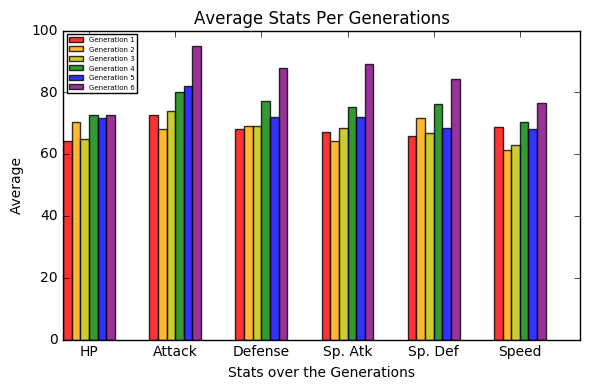

In [7]:
# Values to plot bar graph side by side
index = np.arange(groups)
bar_width = 0.1
opacity = 0.8

gen_1 = plt.bar(index, gen1_means, bar_width,
                 alpha=opacity,
                 color='R',
                 label='Generation 1')
gen_2 = plt.bar(index+bar_width, gen2_means, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='Generation 2')
gen_3 = plt.bar(index+(bar_width*2), gen3_means, bar_width,
                 alpha=opacity,
                 color='Y',
                 label='Generation 3')
gen_4 = plt.bar(index+(bar_width*3), gen4_means, bar_width,
                 alpha=opacity,
                 color='G',
                 label='Generation 4')
gen_5 = plt.bar(index+(bar_width*4), gen5_means, bar_width,
                 alpha=opacity,
                 color='B',
                 label='Generation 5')
gen_6 = plt.bar(index+(bar_width*5), gen6_means, bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Generation 6')

plt.xlabel('Stats over the Generations')
plt.ylabel('Average')
plt.title('Average Stats Per Generations')

plt.xticks(index +(bar_width*3), labels)
plt.legend(loc=2,prop={'size':5})

plt.tight_layout()
plt.show()

The following code is due to the fact that not all types are in every generation of pokemon. To be able to put down each generation accurately, I use the aformentioned code to determine which types in my data sets are members of which generation.

In [8]:
types = set(data['Type 1'])
for i in types:
    print(i + " type are generations:")
    print(set(data[data['Type 1'] == i]['Generation']))

Dark type are generations:
{2, 3, 4, 5, 6}
Water type are generations:
{1, 2, 3, 4, 5, 6}
Grass type are generations:
{1, 2, 3, 4, 5, 6}
Fighting type are generations:
{1, 2, 3, 4, 5, 6}
Dragon type are generations:
{1, 3, 4, 5, 6}
Rock type are generations:
{1, 2, 3, 4, 5, 6}
Fairy type are generations:
{1, 2, 4, 6}
Ice type are generations:
{1, 2, 3, 4, 5, 6}
Flying type are generations:
{5, 6}
Bug type are generations:
{1, 2, 3, 4, 5, 6}
Ground type are generations:
{1, 2, 3, 4, 5, 6}
Fire type are generations:
{1, 2, 3, 4, 5, 6}
Steel type are generations:
{2, 3, 4, 5, 6}
Poison type are generations:
{1, 2, 3, 4, 5, 6}
Ghost type are generations:
{1, 2, 3, 4, 5, 6}
Psychic type are generations:
{1, 2, 3, 4, 5, 6}
Electric type are generations:
{1, 2, 3, 4, 5, 6}
Normal type are generations:
{1, 2, 3, 4, 5, 6}


Using the output above I pull out the types that are not in every generation (Flying, Fairy, Dragon, Steel, & Dark) and manually map their graphs for the other types you can manually input them similarly to the code for the total average graphs. For both the code above and below I use a for-loop to iterate through the pokemon types more efficiently than manually going through all 18 types.

Dark


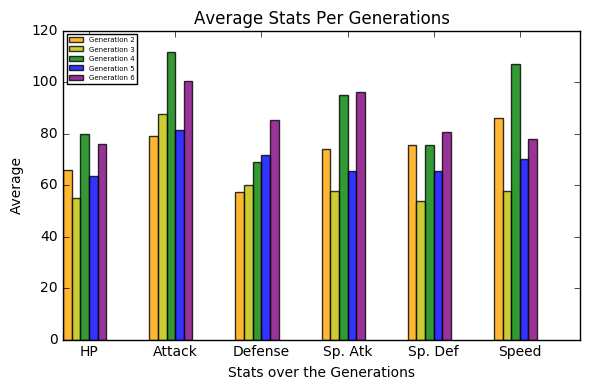

Water


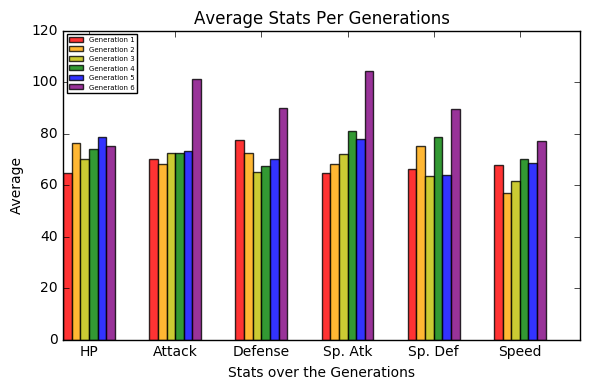

Grass


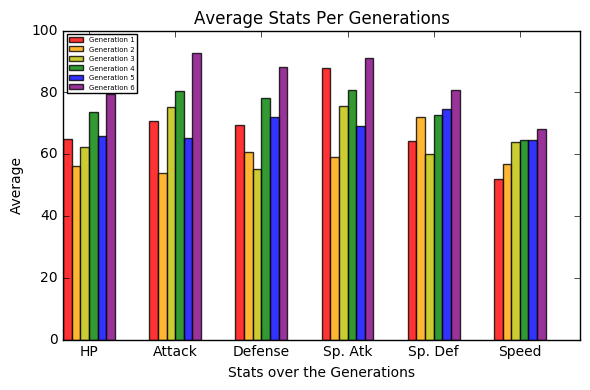

Fighting


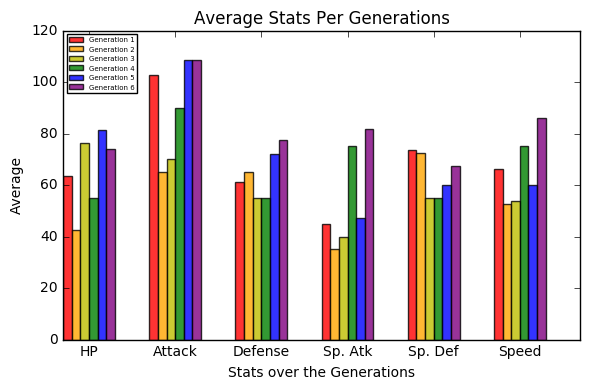

Dragon


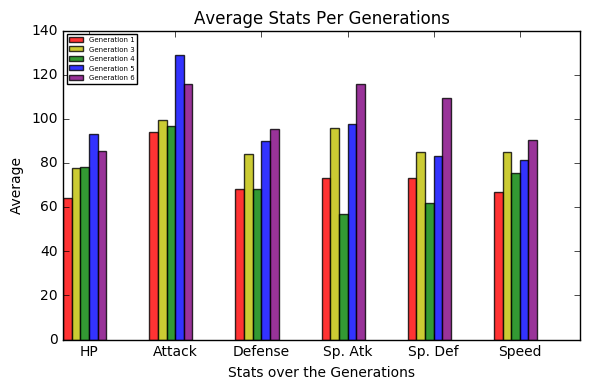

Rock


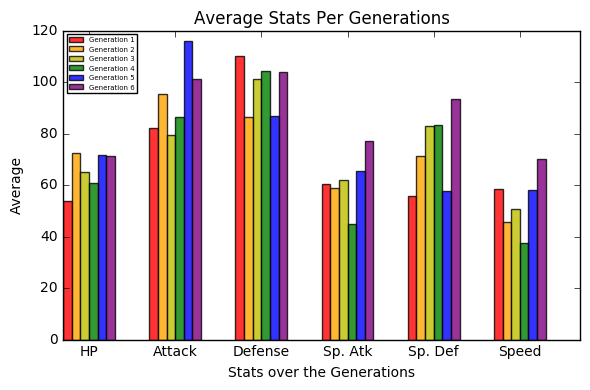

Fairy


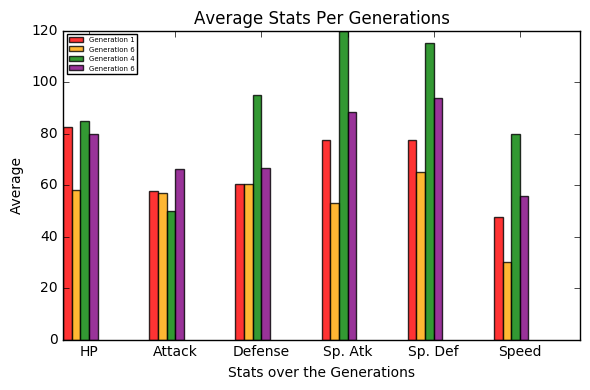

Ice


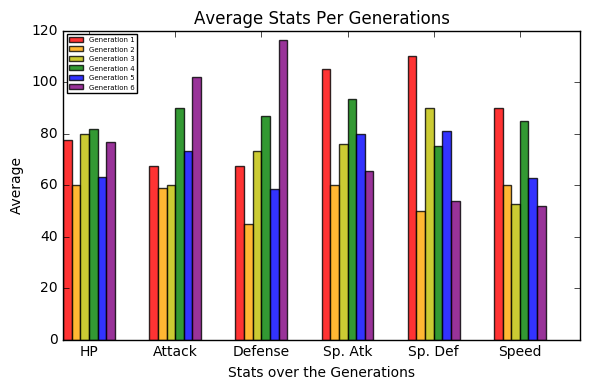

Flying


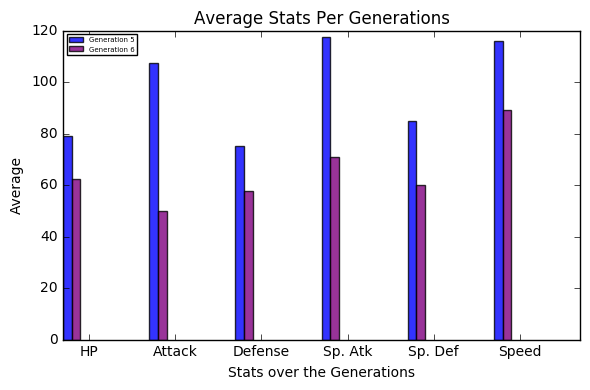

Bug


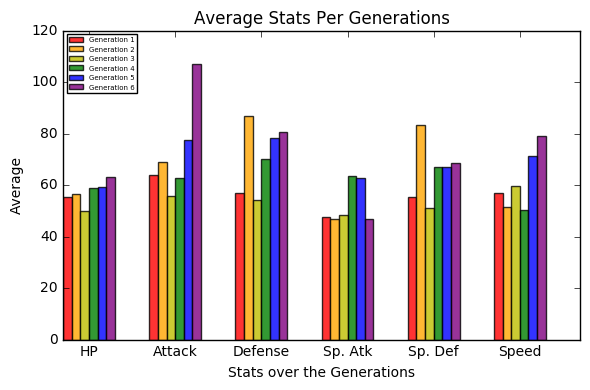

Ground


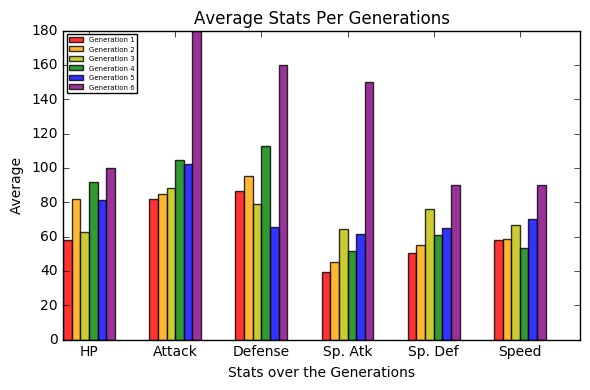

Fire


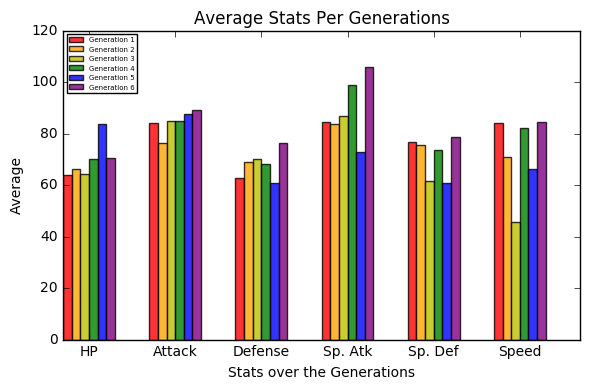

Steel


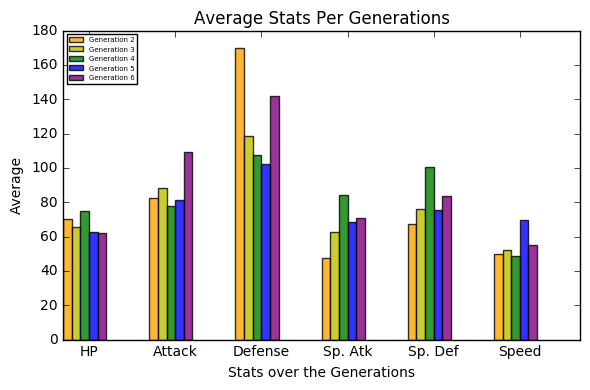

Poison


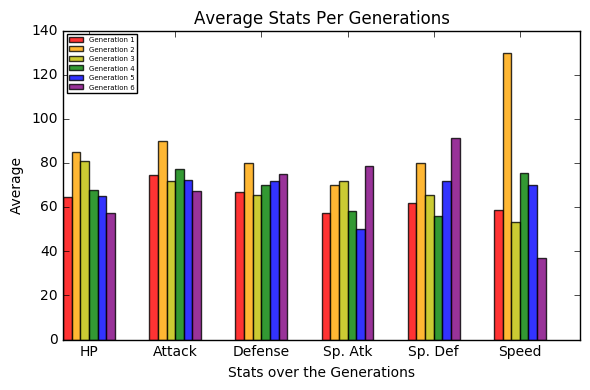

Ghost


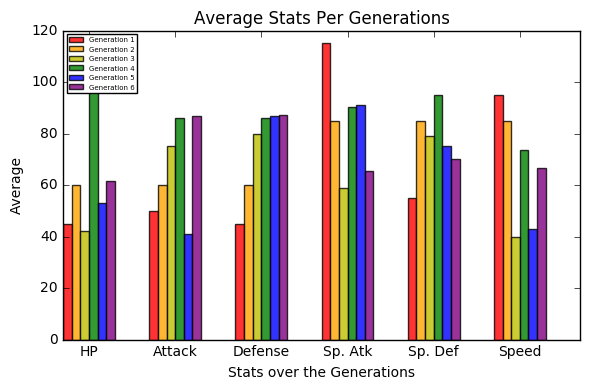

Psychic


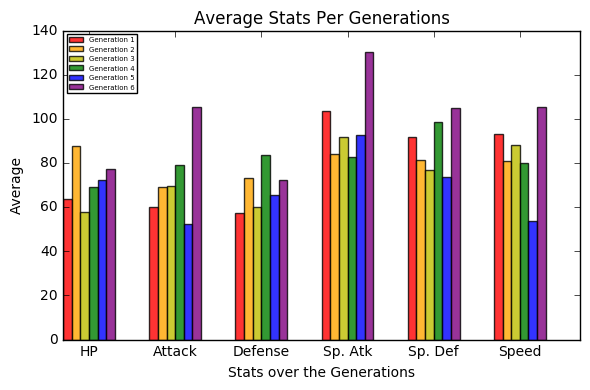

Electric


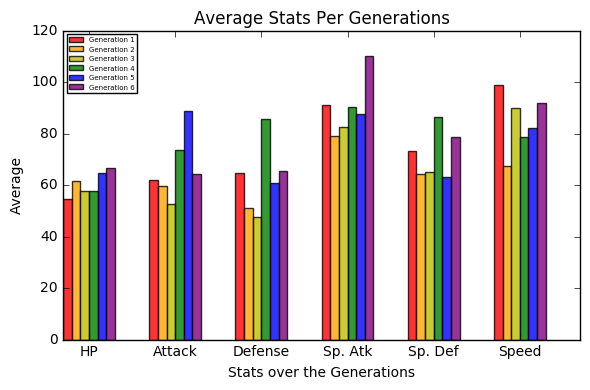

Normal


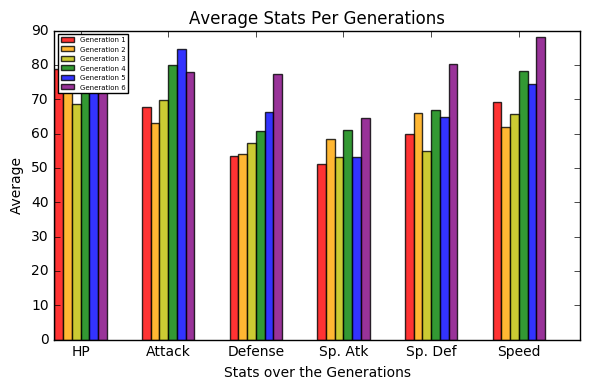

In [9]:
for poketype in set(data['Type 1']):
    curr_poketype = data[data['Type 1'] == poketype]
    poketype_avg = curr_poketype.groupby("Generation").mean()
    poketype_avg = poketype_avg.reset_index()
    poketype_avg = poketype_avg.drop(poketype_avg.columns[[0, 1, 2, 9]], axis=1)
    
    fig, ax = plt.subplots()
    print(poketype)
    
    if poketype == 'Flying':
        plt.bar(index, poketype_avg.loc[0], bar_width, alpha = opacity, color='B', label='Generation 5')
        plt.bar(index+bar_width, poketype_avg.loc[1], bar_width, alpha = opacity, color='purple', label='Generation 6')
    elif poketype == 'Fairy':
        plt.bar(index, poketype_avg.loc[0], bar_width, alpha = opacity, color='R', label='Generation 1')
        plt.bar(index+bar_width, poketype_avg.loc[1], bar_width, alpha = opacity, color='orange', label='Generation 6')
        plt.bar(index+(bar_width*2), poketype_avg.loc[2], bar_width, alpha = opacity, color='G', label='Generation 4')
        plt.bar(index+(bar_width*3), poketype_avg.loc[3], bar_width, alpha = opacity, color='purple', label='Generation 6')
    elif poketype == 'Dragon':    
        plt.bar(index, poketype_avg.loc[0], bar_width, alpha = opacity, color='R', label='Generation 1')
        plt.bar(index+bar_width, poketype_avg.loc[1], bar_width, alpha = opacity, color='Y', label='Generation 3')
        plt.bar(index+(bar_width*2), poketype_avg.loc[2], bar_width, alpha = opacity, color='G', label='Generation 4')
        plt.bar(index+(bar_width*3), poketype_avg.loc[3], bar_width, alpha = opacity, color='B', label='Generation 5')
        plt.bar(index+(bar_width*4), poketype_avg.loc[4], bar_width, alpha = opacity, color='purple', label='Generation 6')   
    elif poketype == 'Steel':
        plt.bar(index, poketype_avg.loc[0], bar_width, alpha = opacity, color='orange', label='Generation 2')
        plt.bar(index+bar_width, poketype_avg.loc[1], bar_width, alpha = opacity, color='Y', label='Generation 3')
        plt.bar(index+(bar_width*2), poketype_avg.loc[2], bar_width, alpha = opacity, color='G', label='Generation 4')
        plt.bar(index+(bar_width*3), poketype_avg.loc[3], bar_width, alpha = opacity, color='B', label='Generation 5')
        plt.bar(index+(bar_width*4), poketype_avg.loc[4], bar_width, alpha = opacity, color='purple', label='Generation 6')   
    elif poketype == 'Dark':
        plt.bar(index, poketype_avg.loc[0], bar_width, alpha = opacity, color='orange', label='Generation 2')
        plt.bar(index+bar_width, poketype_avg.loc[1], bar_width, alpha = opacity, color='Y', label='Generation 3')
        plt.bar(index+(bar_width*2), poketype_avg.loc[2], bar_width, alpha = opacity, color='G', label='Generation 4')
        plt.bar(index+(bar_width*3), poketype_avg.loc[3], bar_width, alpha = opacity, color='B', label='Generation 5')
        plt.bar(index+(bar_width*4), poketype_avg.loc[4], bar_width, alpha = opacity, color='purple', label='Generation 6')     
    else:
        plt.bar(index, poketype_avg.loc[0], bar_width, alpha = opacity, color='R', label='Generation 1')
        plt.bar(index+bar_width, poketype_avg.loc[1], bar_width, alpha = opacity, color='orange', label='Generation 2')
        plt.bar(index+(bar_width*2), poketype_avg.loc[2], bar_width, alpha = opacity, color='Y', label='Generation 3')
        plt.bar(index+(bar_width*3), poketype_avg.loc[3], bar_width, alpha = opacity, color='G', label='Generation 4')
        plt.bar(index+(bar_width*4), poketype_avg.loc[4], bar_width, alpha = opacity, color='B', label='Generation 5')
        plt.bar(index+(bar_width*5), poketype_avg.loc[5], bar_width, alpha = opacity, color='purple', label='Generation 6')   
    
    plt.xlabel('Stats over the Generations')
    plt.ylabel('Average')
    plt.title('Average Stats Per Generations')

    plt.xticks(index +(bar_width*3), labels)
    plt.legend(loc=2,prop={'size':5})

    plt.tight_layout()
    plt.show()

## Analysis and Machine Learning

The following code will be a proper analysis of the first 6 generations of the pokemon franchise. My null hypothesis will be that there is no significant change between generations, specifically that for an arbritrary generation (k), generation (k-1) will be equally as powerful. Since I reject this notion when I apply linear regression lines to the data I am going to output I should be a positive slope. If I recieve a type I error the linear regression line will be a relatively straight line.  

The code below iterates through the types of the pokemon types and plots them according to the individual pokemon's total power for each generation. On top of the plot I have mapped the regression line for each type. 

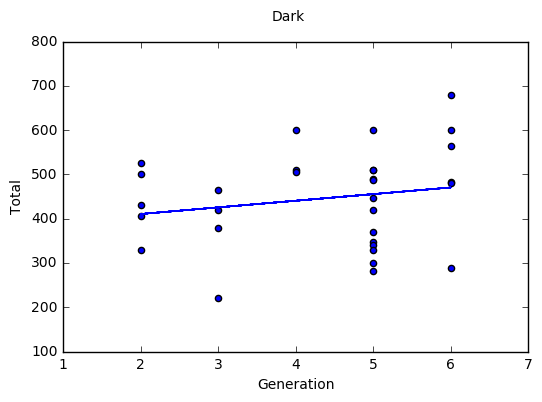

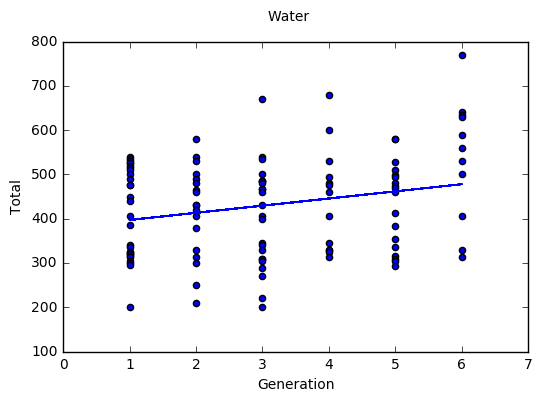

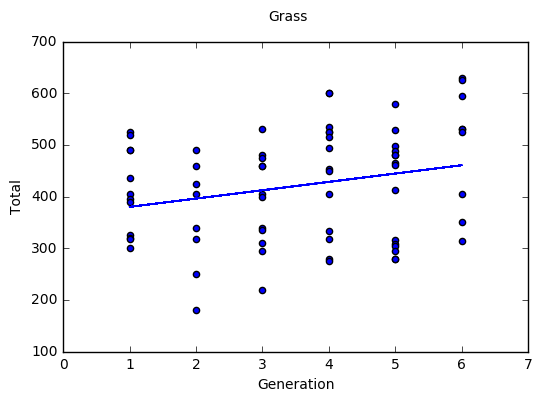

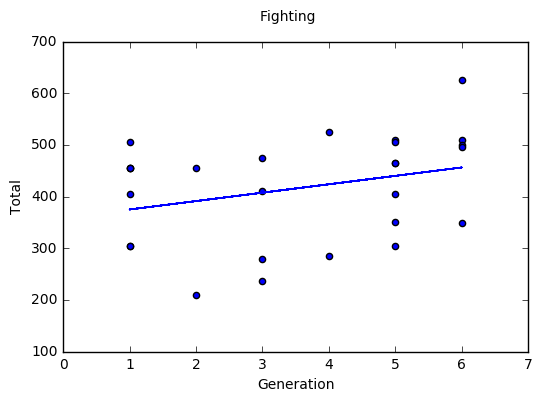

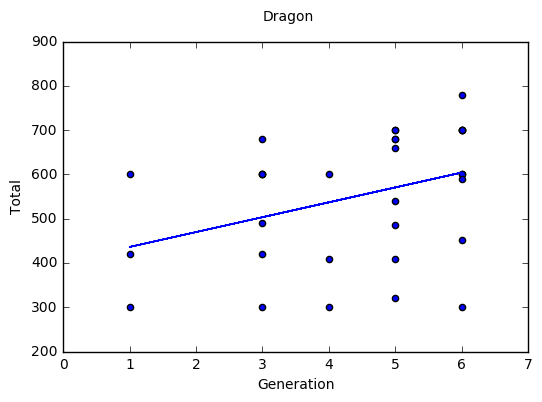

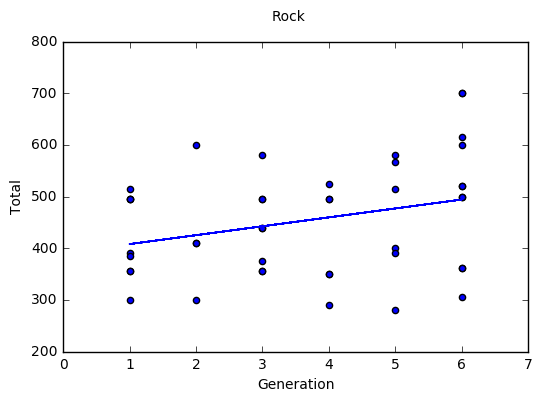

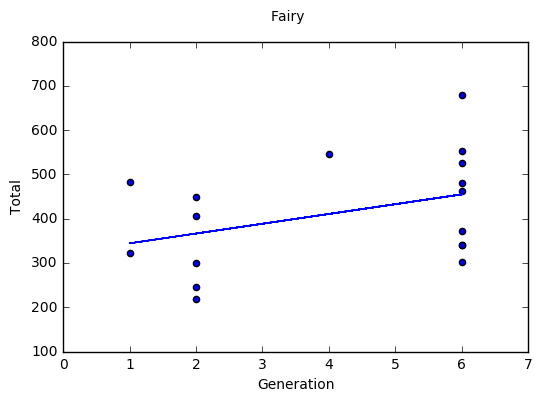

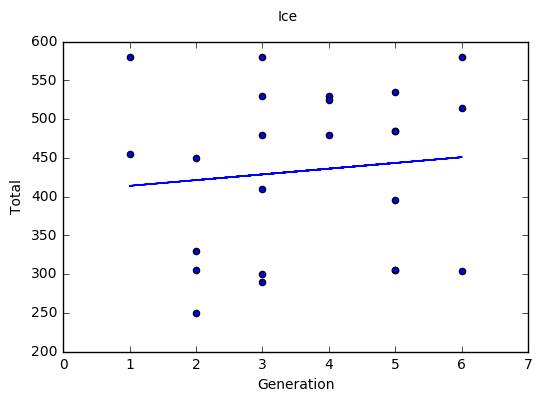

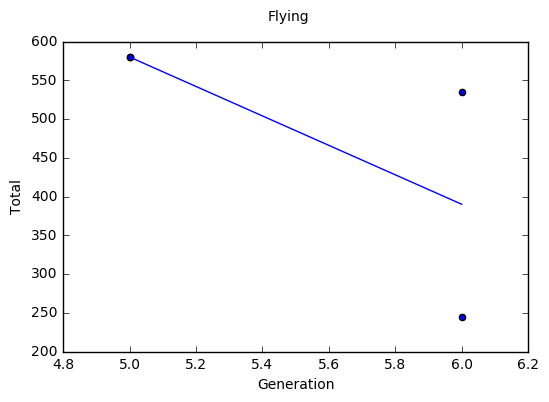

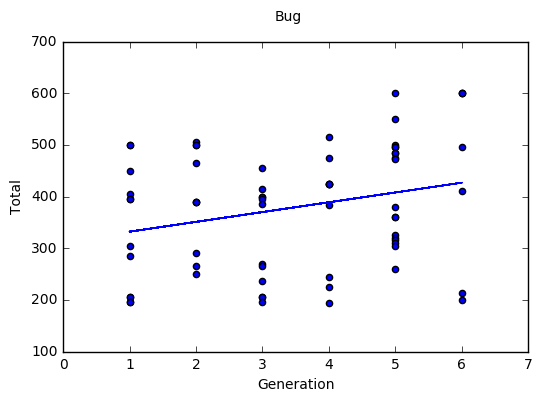

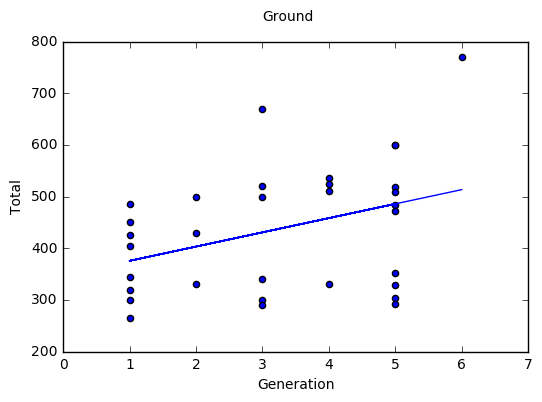

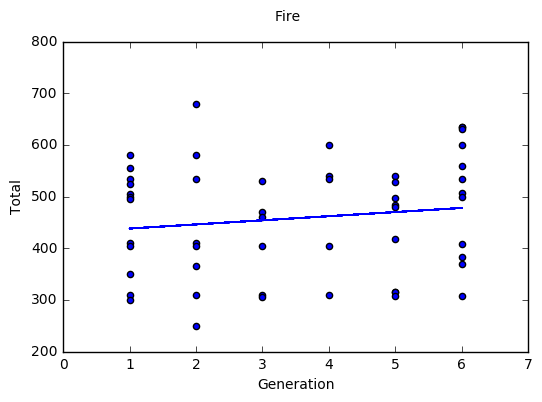

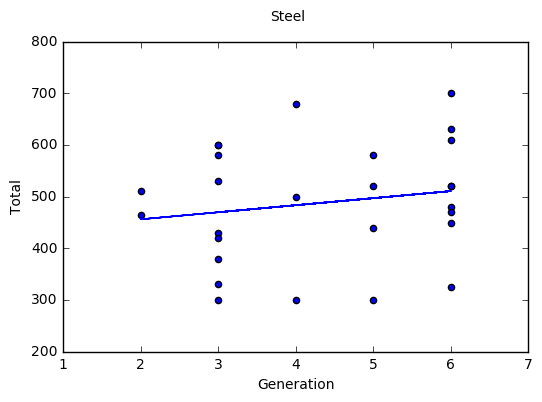

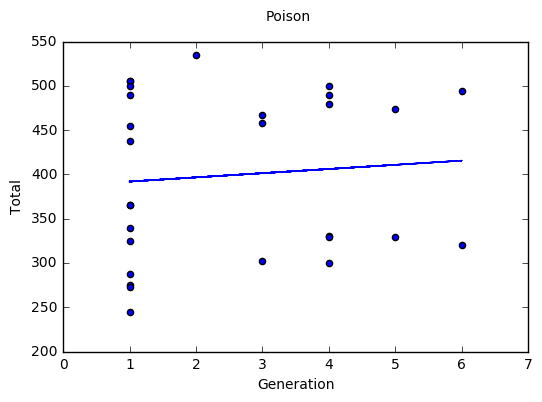

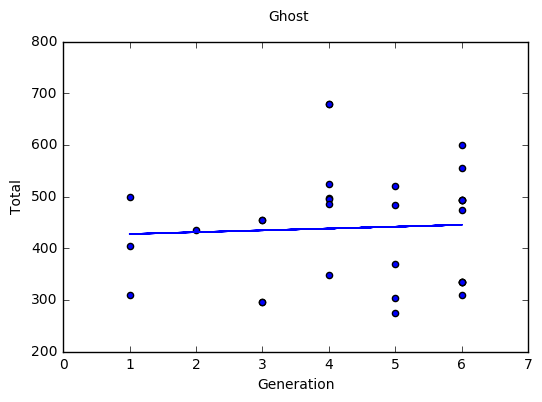

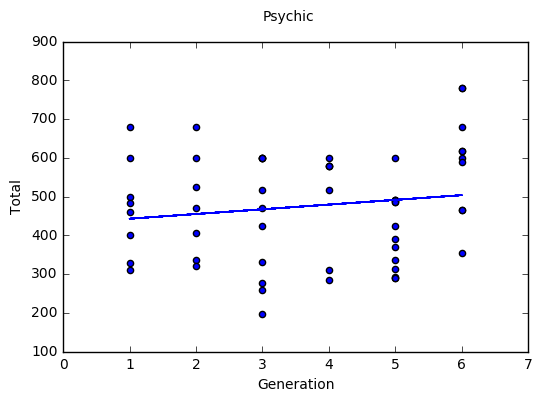

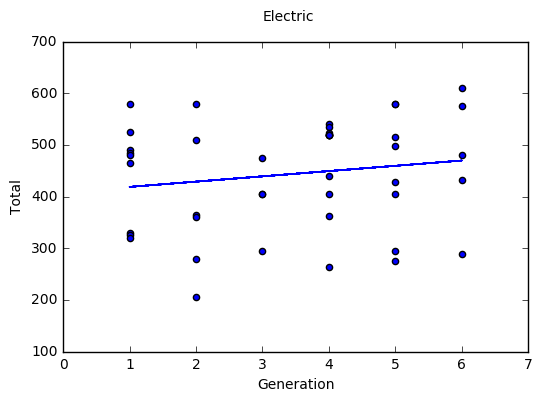

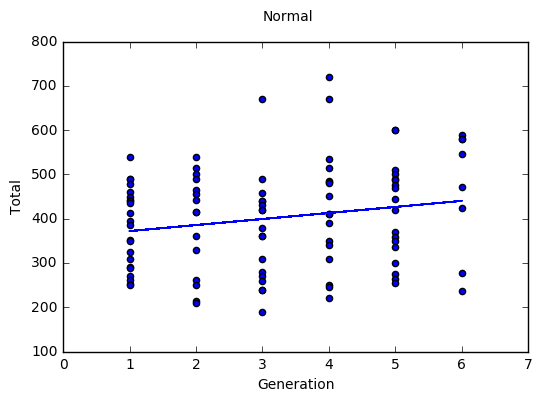

In [10]:
for i in set(data['Type 1']):
    curr_type = data[data['Type 1'] == i]
    curr_type.plot.scatter(x = 'Generation', y = 'Total')
    x = curr_type['Generation']
    y = curr_type['Total']
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, '-')
    plt.suptitle(i)
    plt.show()

By observing the regression we can see for 17 out of the 18 types our regression line increases over the generations. For the single type that goes down (flying), this can be attributed to the small sample size of pokemon which have flying as their first type, and despite this there is still a pokemon that has a comparable total score to the previous generation. Thus according to these plots we can safely say that basically every type of pokemon grew stronger as the generations passed.

Since we can say every type has gotten more powerful now I'm going through every stat and checking how they have changed over the generations. First mapping a box plot of the total power then iterating through the six stats and making a boxplot and regression line for all of them.

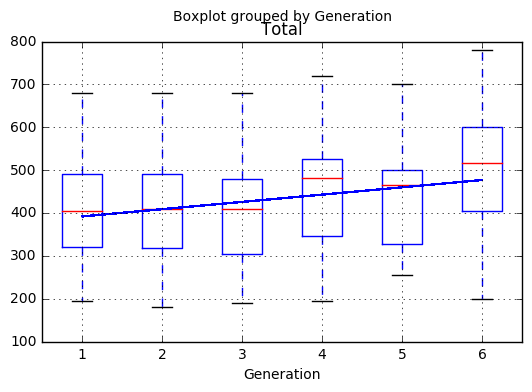

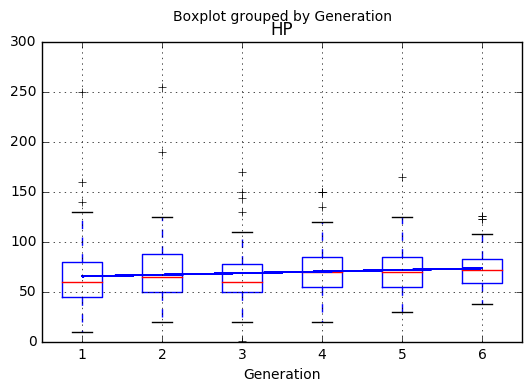

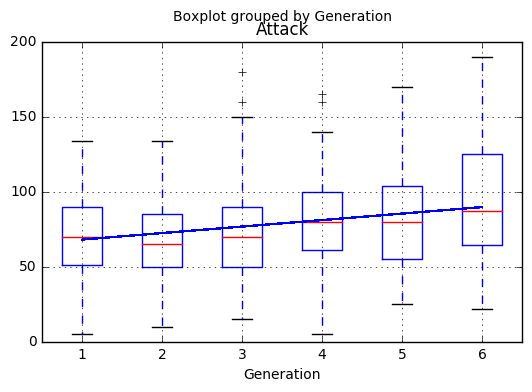

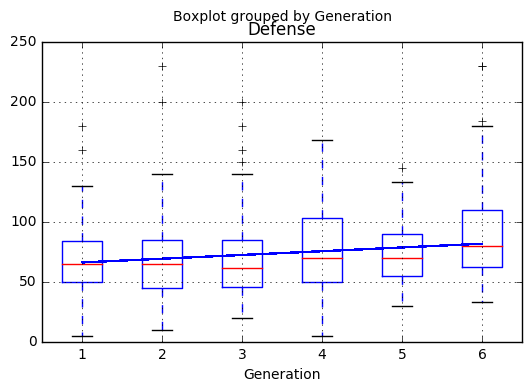

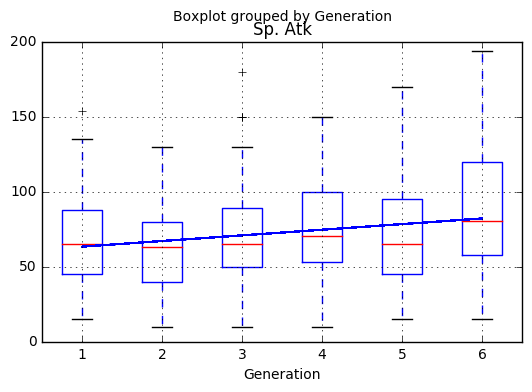

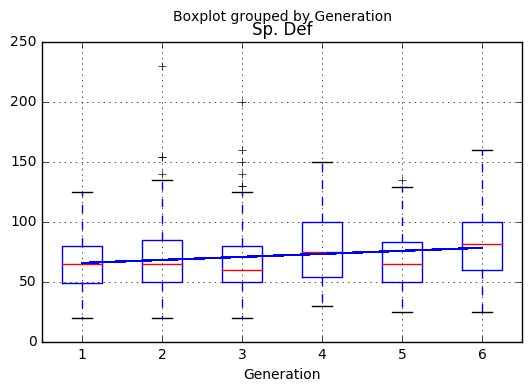

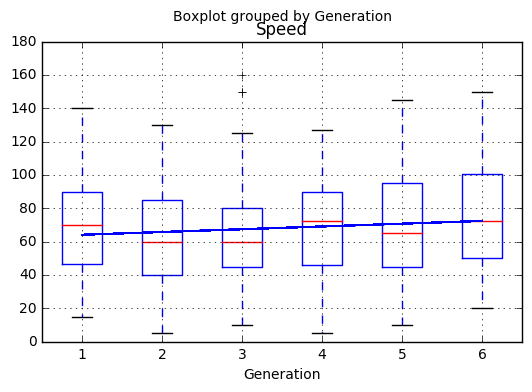

In [11]:
data.boxplot('Total', by = 'Generation')
x = data['Generation']
y = data['Total']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-')
plt.show()
    
for i in labels:
    data.boxplot(i, by = 'Generation')
    x = data['Generation']
    y = data[i]
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, '-')
    plt.show()

Now we can see through the regression line that every single stat over time becomes larger becomes larger as a function of time/generation increase. While some are larger than others I feel we can accurately state that the pokemon do become more powerful as the generations go on, thus rejecting the null hypothesis.

## Conclusion & Insight

Given our null hypothesis, our actual hypothesis, and the result achieved it seems to say that in general the new pokemon are usually stronger than their predecessors. In addition to this we can make some other observations about the data set and more specifically which pokemon we would want to pick in the following generations. These observations lead to two opposing opinions which are both equally plausible.

So the first idea we can draw is that in the new pokemon, picking the newer pokemon will most likely give you an edge over the older pokemon. This seems to be a supported trend no matter how we observed the data, more recent generations had better stats overall.

Based on the type graphs seen above we can conclude 1 of 2 things. The first being if the trends will continue then the graphs with the steepest slopes will continue to be the most powerful in the game. Looking at them you can telll ground and dragon type have the advantage here.

Conversely, if they seek to balance the game there will be less of the aformentioned types in the coming generations or they will be not as strong. Instead we will see a rise in pokemon with low population and whose power graphs being flatter would mark them as generally weaker than their counterparts, as such we may see an increase in flying types as well as an increase in the overall stats of them as well as an increase to ghost types.

## Closing & Sources

This tutorial covered some basic ways to interact, edit, and observe data from the pokemon franchise. There are many more elaborate and extensive ways to display and process the data, links to some of them as well as all resources required to re-create this will be posted below. I hope you have enjoyed my python tutorial on Pokemon, thank you. 

[Anaconda](https://www.continuum.io/anaconda-overview)

[Jupyter Notebook](jupyter.org/)

[Matplotlib](https://matplotlib.org/) 

[Numpy](www.numpy.org/)

[Pandas](pandas.pydata.org/)

[Pokemon Database](https://www.kaggle.com/abcsds/pokemon)

[Regular Expressions Library](https://docs.python.org/2/library/re.html)

[Sklearn](scikit-learn.org/).
